In [57]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)


In [58]:
data = pd.read_csv('model_df.csv', index_col=0)

In [59]:
data

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,credit_hist_years
4,68476807,10400.0,60 months,22.45,289.91,F,F1,3,MORTGAGE,104433.0,2015-12-01,major_purchase,PA,25.37,1.0,1998-06-01,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,0.0,Individual,0.128894,17.5
13,66624733,18000.0,60 months,19.48,471.70,E,E2,7,RENT,150000.0,2015-12-01,debt_consolidation,CA,9.39,0.0,2005-06-01,665.0,669.0,1.0,18.0,1.0,14052.0,40.7,27.0,0.0,0.0,0.0,Individual,-0.474848,10.5
19,68495092,8650.0,36 months,19.89,320.99,E,E3,8,RENT,55000.0,2015-12-01,debt_consolidation,IN,25.49,0.0,2005-03-01,675.0,679.0,4.0,18.0,1.0,9568.0,46.0,19.0,0.0,0.0,0.0,Individual,0.062484,10.8
27,68526907,16000.0,60 months,17.97,406.04,D,D4,1,MORTGAGE,109000.0,2015-12-01,debt_consolidation,NM,23.35,0.0,2002-04-01,680.0,684.0,1.0,11.0,0.0,42469.0,87.6,33.0,0.0,0.0,0.0,Individual,0.091973,13.7
31,68341789,24250.0,60 months,24.24,701.01,F,F3,4,MORTGAGE,75000.0,2015-12-01,debt_consolidation,NY,20.84,0.0,2007-04-01,660.0,664.0,0.0,18.0,0.0,24799.0,65.3,21.0,0.0,0.0,0.0,Individual,-0.829921,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260514,90195681,6400.0,36 months,19.99,237.82,D,D4,0,MORTGAGE,18876.0,2016-10-01,debt_consolidation,NY,12.84,0.0,2006-05-01,670.0,674.0,0.0,5.0,1.0,7380.0,70.3,11.0,0.0,0.0,0.0,Individual,0.162377,10.4
2260535,90229508,30000.0,60 months,17.99,761.64,D,D2,10,RENT,130000.0,2016-10-01,debt_consolidation,NY,10.54,0.0,1997-10-01,695.0,699.0,2.0,17.0,0.0,21536.0,36.4,39.0,0.0,0.0,0.0,Individual,0.110282,19.0
2260541,90155344,7000.0,36 months,16.99,249.54,D,D1,1,RENT,68000.0,2016-10-01,debt_consolidation,TX,12.60,0.0,2004-07-01,665.0,669.0,1.0,7.0,0.0,4897.0,85.9,15.0,0.0,0.0,0.0,Individual,0.119273,12.3
2260547,90265158,19200.0,60 months,17.99,487.45,D,D2,10,RENT,55000.0,2016-10-01,debt_consolidation,FL,28.47,1.0,2002-05-01,670.0,674.0,0.0,20.0,1.0,12698.0,44.6,33.0,0.0,0.0,0.0,Individual,-0.410815,14.4


In [60]:
drop_cols = ['earliest_cr_line', 'grade', 'id', 'fico_range_low', 'issue_d']
data= data.drop(drop_cols,axis=1)

(0, 50)

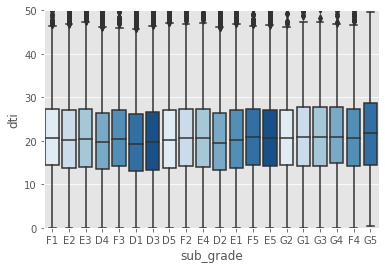

In [61]:
import seaborn as sns

sns.boxplot(x='sub_grade', y='dti' , data=data, palette = sns.color_palette("Blues", n_colors=7))
plt.ylim(0,50)

## Random Forest

In [62]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [63]:
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,credit_hist_years
4,10400.0,60 months,22.45,289.91,F1,3,MORTGAGE,104433.0,major_purchase,PA,25.37,1.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,0.0,Individual,0.128894,17.5
13,18000.0,60 months,19.48,471.70,E2,7,RENT,150000.0,debt_consolidation,CA,9.39,0.0,669.0,1.0,18.0,1.0,14052.0,40.7,27.0,0.0,0.0,0.0,Individual,-0.474848,10.5
19,8650.0,36 months,19.89,320.99,E3,8,RENT,55000.0,debt_consolidation,IN,25.49,0.0,679.0,4.0,18.0,1.0,9568.0,46.0,19.0,0.0,0.0,0.0,Individual,0.062484,10.8
27,16000.0,60 months,17.97,406.04,D4,1,MORTGAGE,109000.0,debt_consolidation,NM,23.35,0.0,684.0,1.0,11.0,0.0,42469.0,87.6,33.0,0.0,0.0,0.0,Individual,0.091973,13.7
31,24250.0,60 months,24.24,701.01,F3,4,MORTGAGE,75000.0,debt_consolidation,NY,20.84,0.0,664.0,0.0,18.0,0.0,24799.0,65.3,21.0,0.0,0.0,0.0,Individual,-0.829921,8.7


In [64]:
le = LabelEncoder()

In [65]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

for feature in categorical_features:
    data[feature]=le.fit_transform(data[feature])
data

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,credit_hist_years
4,10400.0,1,22.45,289.91,10,3,1,104433.0,6,38,25.37,1.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,0.0,0,0.128894,17.5
13,18000.0,1,19.48,471.70,6,7,5,150000.0,2,4,9.39,0.0,669.0,1.0,18.0,1.0,14052.0,40.7,27.0,0.0,0.0,0.0,0,-0.474848,10.5
19,8650.0,0,19.89,320.99,7,8,5,55000.0,2,15,25.49,0.0,679.0,4.0,18.0,1.0,9568.0,46.0,19.0,0.0,0.0,0.0,0,0.062484,10.8
27,16000.0,1,17.97,406.04,3,1,1,109000.0,2,32,23.35,0.0,684.0,1.0,11.0,0.0,42469.0,87.6,33.0,0.0,0.0,0.0,0,0.091973,13.7
31,24250.0,1,24.24,701.01,12,4,1,75000.0,2,34,20.84,0.0,664.0,0.0,18.0,0.0,24799.0,65.3,21.0,0.0,0.0,0.0,0,-0.829921,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260514,6400.0,0,19.99,237.82,3,0,1,18876.0,2,34,12.84,0.0,674.0,0.0,5.0,1.0,7380.0,70.3,11.0,0.0,0.0,0.0,0,0.162377,10.4
2260535,30000.0,1,17.99,761.64,1,10,5,130000.0,2,34,10.54,0.0,699.0,2.0,17.0,0.0,21536.0,36.4,39.0,0.0,0.0,0.0,0,0.110282,19.0
2260541,7000.0,0,16.99,249.54,0,1,5,68000.0,2,43,12.60,0.0,669.0,1.0,7.0,0.0,4897.0,85.9,15.0,0.0,0.0,0.0,0,0.119273,12.3
2260547,19200.0,1,17.99,487.45,1,10,5,55000.0,2,9,28.47,1.0,674.0,0.0,20.0,1.0,12698.0,44.6,33.0,0.0,0.0,0.0,0,-0.410815,14.4


In [66]:
Xrf = data.drop('roi_percent', axis=1)
yrf = data['roi_percent']


In [67]:
from sklearn.model_selection import train_test_split

Xrf_train,Xrf_test, yrf_train, yrf_test = train_test_split(Xrf,yrf)

In [ ]:
randomForest = ensemble.RandomForestRegressor()

grid_param_forest = [{
    "n_estimators": [25, 50, 100],
    "max_features": [5,10,15,20],
    "random_state": [42]}]

grid_randomForest= GridSearchCV(estimator = randomForest,param_grid=grid_param_forest, scoring='r2',cv=5)


grid_randomForest.fit(Xrf_train,yrf_train)


In [44]:
grid_randomForest.best_params_


{'max_features': 5, 'n_estimators': 100, 'random_state': 42}

In [55]:
top_forest = grid_randomForest.best_estimator_


In [49]:
grid_randomForest.best_score_




0.09287902290195699

In [50]:
grid_randomForest.predict(Xrf_train)

array([ 0.11066897, -0.09011581,  0.19715754, ...,  0.06724095,
       -0.47718736,  0.04700186])

In [53]:
joint = Xrf_train.copy()

joint['prediction'] = grid_randomForest.predict(Xrf_train)

rf_joint_df1 = pd.concat([joint,yrf_train],axis=1)
rf_joint_df1

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,issue_d,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prediction,roi_percent
2205904,13000.0,0,18.99,476.47,2,10,4,57200.0,111,2,1,21.15,1.0,684.0,0.0,4.0,0.0,6392.0,80.9,19.0,0.0,0.0,0.0,0,17.7,0.110669,0.220231
1219608,16800.0,1,16.29,411.14,1,1,1,125000.0,84,1,27,7.24,0.0,669.0,3.0,9.0,0.0,11238.0,78.0,34.0,0.0,0.0,0.0,0,10.9,-0.090116,-0.198779
259542,4675.0,0,18.25,169.60,5,0,4,13000.0,94,2,24,18.19,0.0,734.0,2.0,4.0,0.0,2218.0,44.4,5.0,0.0,0.0,0.0,0,21.2,0.197158,0.302745
1030437,30000.0,0,18.25,1088.34,2,10,4,75000.0,103,4,40,13.26,0.0,794.0,0.0,6.0,0.0,1686.0,12.5,23.0,0.0,0.0,0.0,0,11.3,-0.520893,-0.658317
2222508,15000.0,1,24.74,437.99,7,2,1,45000.0,111,2,27,19.71,0.0,714.0,2.0,4.0,0.0,8794.0,53.3,8.0,0.0,0.0,0.0,0,18.4,0.212729,0.345854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413748,9325.0,0,15.59,325.96,0,1,1,45000.0,89,2,47,25.84,2.0,689.0,2.0,11.0,0.0,3509.0,68.8,28.0,0.0,0.0,0.0,0,9.9,0.071104,0.044524
1190982,7650.0,0,15.61,267.49,0,1,4,72000.0,86,2,5,1.10,0.0,684.0,3.0,16.0,1.0,1503.0,21.5,51.0,0.0,0.0,0.0,0,16.0,-0.063658,-0.090884
1196686,30000.0,0,18.99,1099.53,5,10,5,87000.0,85,2,34,10.77,0.0,684.0,0.0,15.0,0.0,34998.0,67.0,28.0,0.0,0.0,0.0,0,18.3,0.067241,0.015825
1888751,11000.0,1,22.95,309.78,10,3,5,42000.0,64,2,38,23.80,0.0,674.0,3.0,10.0,0.0,12463.0,48.3,38.0,0.0,0.0,0.0,0,10.1,-0.477187,-0.859191


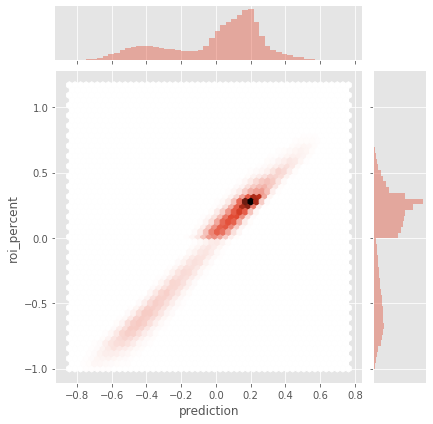

In [54]:
sns.jointplot(x='prediction', y='roi_percent',data=rf_joint_df1, kind='hex')

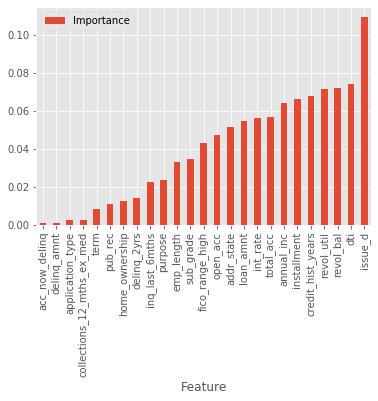

In [56]:
feature_importance=pd.DataFrame(zip(list(top_forest.feature_importances_),Xrf_train.columns))
feature_importance.columns = ['Importance','Feature']
feature_importance.sort_values('Importance').plot.bar(x='Feature',y='Importance')